In [1]:
pip install yfinance neuralprophet matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 23.4 MB/s eta 0:00:00


In [2]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd

# Étape 1 : Fonction pour récupérer et nettoyer les données
def get_stock_data(ticker, start_date, end_date):
    try:
        # Télécharger les données avec yfinance
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)

        if data.empty:
            print(f"{ticker}: No data available.")
            return None

        # Gérer les colonnes avec MultiIndex si nécessaire
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = [' '.join(col).strip() for col in data.columns.values]

        # Identifier la colonne "Close" ou équivalente
        close_col = next((col for col in data.columns if "Close" in col and ticker in col), None)
        if close_col:
            data.reset_index(inplace=True)
            data = data[['Date', close_col]].rename(columns={'Date': 'ds', close_col: 'y'})
        else:
            print(f"{ticker}: No Close or Adjusted Close column found.")
            return None

        # Nettoyage des données
        data.dropna(inplace=True)

        # Vérifier si les données sont numériques
        if not pd.api.types.is_numeric_dtype(data['y']):
            print(f"{ticker}: Data is not numeric after processing.")
            return None

        # Vérifier la longueur de la série temporelle
        if len(data) < 10:
            print(f"{ticker}: Series too short for reliable analysis.")
            return None

        return data
    except Exception as e:
        print(f"{ticker}: Error fetching data - {e}")
        return None

# Étape 2 : Charger les données historiques du Bitcoin
crypto_ticker = "BTC-USD"
start_date = "2024-10-01"
end_date = "2024-12-03"

crypto_data = get_stock_data(crypto_ticker, start_date, end_date)

print(crypto_data.head())

    # Étape 3 : Préparer et entraîner le modèle NeuralProphet
model = NeuralProphet(daily_seasonality=True)
metrics = model.fit(crypto_data)

    # Étape 4 : Faire des prédictions pour les 30 prochains jours
future = model.make_future_dataframe(crypto_data, periods=30)
forecast = model.predict(future)


ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.413% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.413% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_param

                         ds             y
0 2024-10-01 00:00:00+00:00  60837.007812
1 2024-10-02 00:00:00+00:00  60632.785156
2 2024-10-03 00:00:00+00:00  60759.402344
3 2024-10-04 00:00:00+00:00  62067.476562
4 2024-10-05 00:00:00+00:00  62089.949219


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number                     for the learning rate finder (205). The results might not be optimal.


Finding best initial lr:   0%|          | 0/205 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 7. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.413% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 98.413% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [3]:
model.plot(forecast)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behav

[*********************100%***********************]  1 of 1 completed


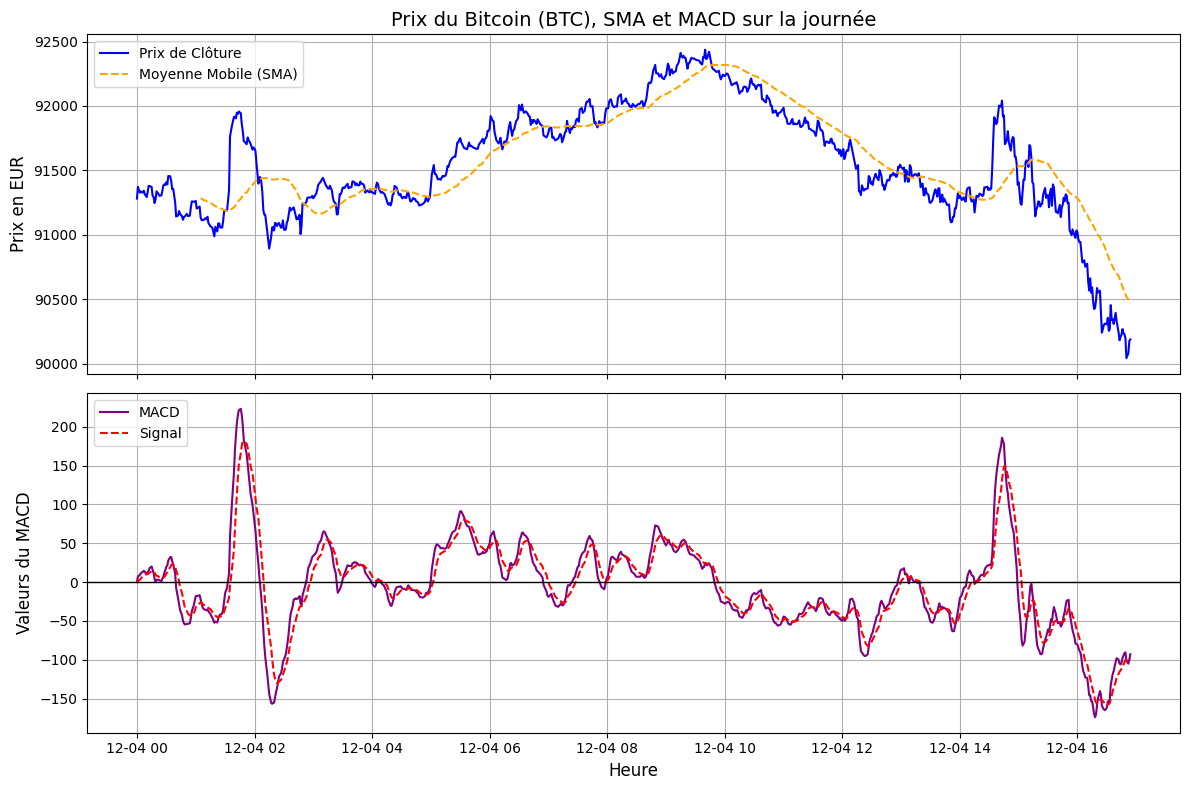

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Télécharger les données du Bitcoin en euros pour la journée précédente
ticker = "BTC-EUR"
data = yf.download(ticker, period="1d", interval="1m")

# Calcul du MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

# Calcul de la Moyenne Mobile (Simple Moving Average - SMA)
def calculate_sma(data, window=50):
    return data['Close'].rolling(window=window).mean()

# Calculer le MACD et le Signal
data['MACD'], data['Signal'] = calculate_macd(data)

# Calculer la Moyenne Mobile
data['SMA'] = calculate_sma(data)

# Créer le graphique avec le prix de clôture, le MACD et la SMA
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Tracer le prix de clôture et la SMA sur le premier axe
ax1.plot(data.index, data['Close'], label='Prix de Clôture', color='blue')
ax1.plot(data.index, data['SMA'], label='Moyenne Mobile (SMA)', color='orange', linestyle='--')
ax1.set_ylabel('Prix en EUR', fontsize=12)
ax1.set_title('Prix du Bitcoin (BTC), SMA et MACD sur la journée', fontsize=14)
ax1.grid(True)
ax1.legend(loc='upper left')

# Tracer le MACD et la ligne de signal sur le deuxième axe
ax2.plot(data.index, data['MACD'], label='MACD', color='purple')
ax2.plot(data.index, data['Signal'], label='Signal', color='red', linestyle='--')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('Valeurs du MACD', fontsize=12)
ax2.set_xlabel('Heure', fontsize=12)
ax2.grid(True)
ax2.legend(loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


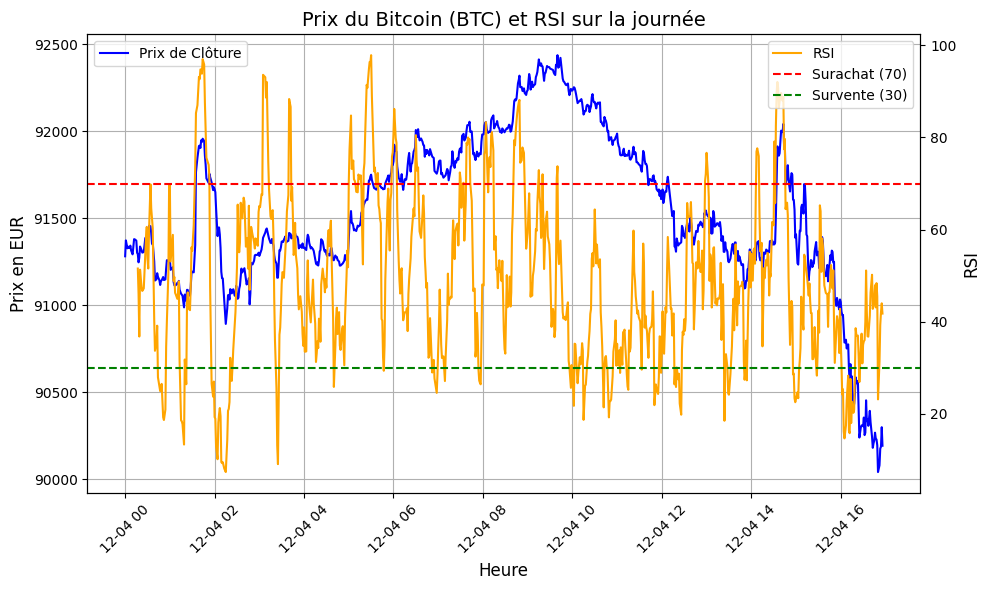

In [6]:
# Télécharger les données du Bitcoin en euros pour la journée précédente
ticker = "BTC-EUR"
data = yf.download(ticker, period="1d", interval="1m")

# Calcul du RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculer le RSI pour les prix de clôture
data['RSI'] = calculate_rsi(data['Close'])

# Créer le graphique avec le prix de clôture et le RSI
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer le prix de clôture sur le premier axe
ax1.plot(data.index, data['Close'], label='Prix de Clôture', color='blue')
ax1.set_xlabel('Heure', fontsize=12)
ax1.set_ylabel('Prix en EUR', fontsize=12)
ax1.set_title('Prix du Bitcoin (BTC) et RSI sur la journée', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)
ax1.legend(loc='upper left')

# Créer un deuxième axe pour le RSI
ax2 = ax1.twinx()
ax2.plot(data.index, data['RSI'], label='RSI', color='orange')
ax2.set_ylabel('RSI', fontsize=12)
ax2.axhline(y=70, color='r', linestyle='--', label='Surachat (70)')
ax2.axhline(y=30, color='g', linestyle='--', label='Survente (30)')
ax2.legend(loc='upper right')

# Afficher le graphique
plt.tight_layout()
plt.show()
